In [110]:
import torch
from torch import nn

from scripts import mnist, train, utils

from matplotlib import pyplot as plt

import cv2

In questo *notebook*, avremo a nostra disposizione 3 reti neurali addestrate a riconoscere cifre scritte a mano dal dataset MNIST.

In [2]:
nn1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

nn2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

nn3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 200),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 200),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 10)
)

In [3]:
trainloader, testloader, _, _, data_transforms = mnist.get_data(batch_size_train=128)

In [6]:
print(torch.load("models/model1.pt").keys())
nn1

dict_keys(['parameters', 'optimizer', 'epoch'])


Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=10, bias=True)
)

In [11]:
nn1.load_state_dict(torch.load("models/model1.pt")["parameters"])
nn2.load_state_dict(torch.load("models/model2.pt")["parameters"])
nn3.load_state_dict(torch.load("models/model3.pt")["parameters"])

<All keys matched successfully>

In [12]:
_ = train.test_model(nn1, testloader, loss_fn=nn.CrossEntropyLoss())
_ = train.test_model(nn2, testloader, loss_fn=nn.CrossEntropyLoss())
_ = train.test_model(nn3, testloader, loss_fn=nn.CrossEntropyLoss())

TESTING - loss 6752.059965610504 - performance 0.9676
TESTING - loss 5701.789255142212 - performance 0.9708
TESTING - loss 3507.7534000873566 - performance 0.9821


In [114]:
from importlib import reload
reload(utils)

<module 'scripts.utils' from 'c:\\Users\\zuzzu\\OneDrive\\Documenti\\moduli formativi 2021\\scripts\\utils.py'>

In [16]:
numero_immagini_prova = 5
data, labels = utils.random_data_extractor(testloader, numero_immagini_prova)

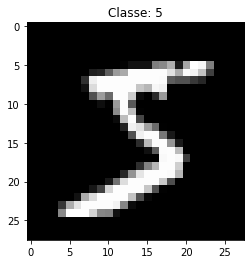

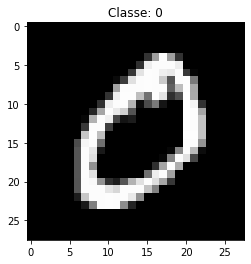

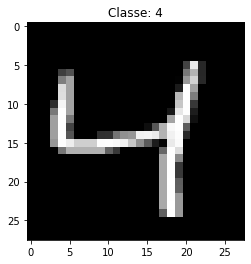

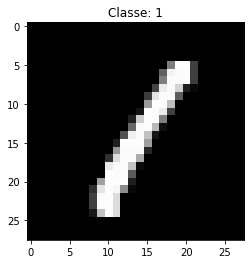

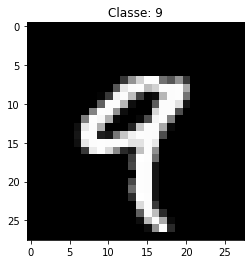

In [29]:
for i in range(numero_immagini_prova):
    utils.show_bw_image(data[i], title=f"Classe: {labels[i].item()}")

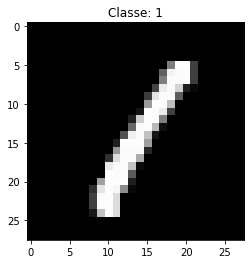

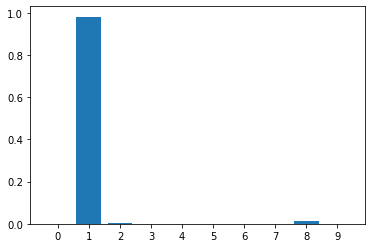

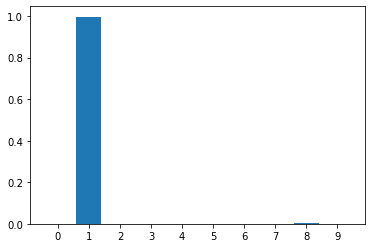

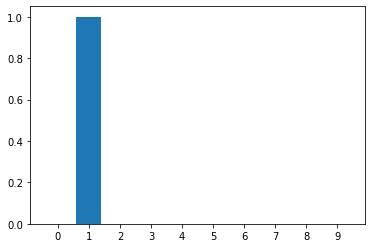

In [66]:
indice = 3
utils.show_bw_image(data[indice], title=f"Classe: {labels[indice].item()}")
utils.plot_nn_output(nn1(data[indice]))
utils.plot_nn_output(nn2(data[indice]))
utils.plot_nn_output(nn3(data[indice]))

... 0
15
5


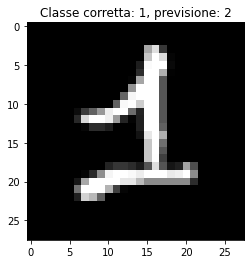

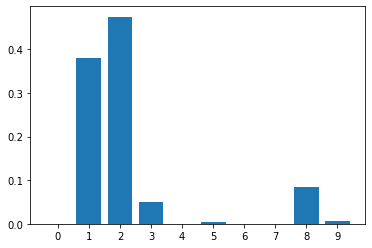

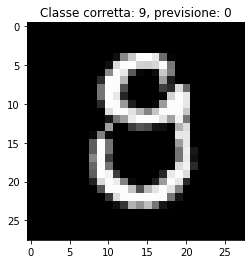

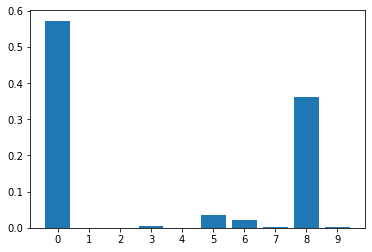

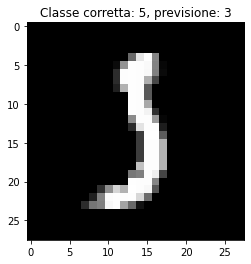

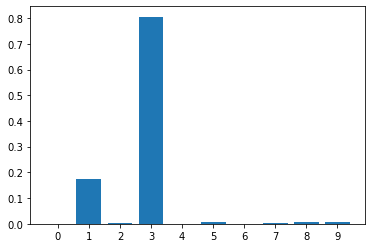

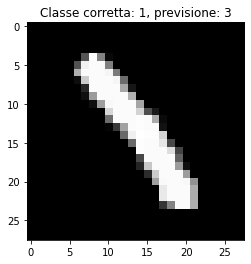

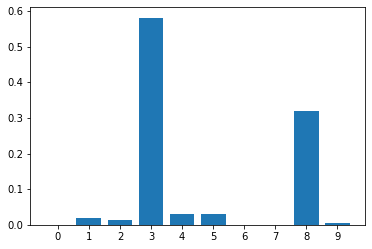

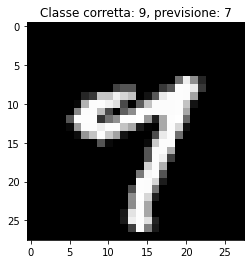

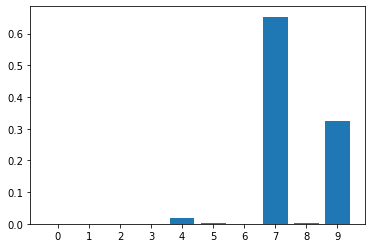

In [104]:
immagini_errore, classe_corretta, previsione = utils.get_first_n_error(nn1, testloader)

for i in range(len(immagini_errore)):
    utils.show_bw_image(immagini_errore[i], title=f"Classe corretta: {classe_corretta[i]}, previsione: {previsione[i]}")
    utils.plot_nn_output(nn1(immagini_errore[i]))

... 0
16
5


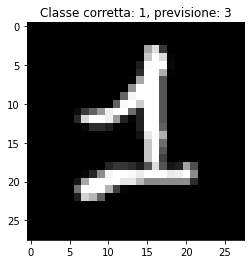

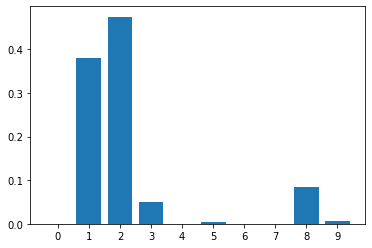

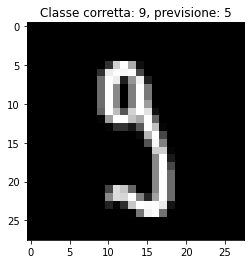

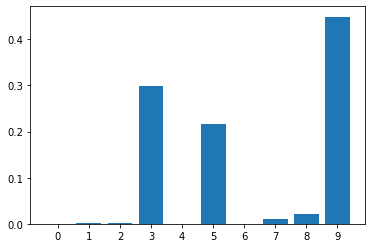

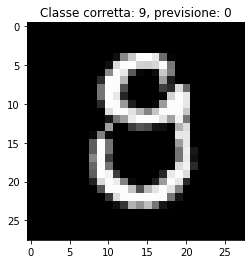

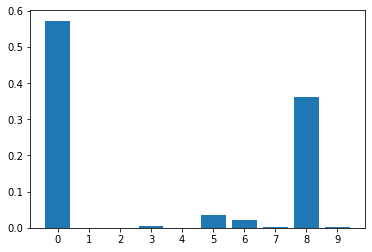

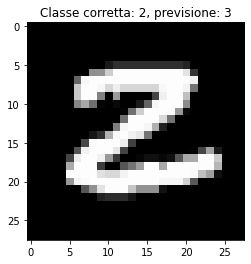

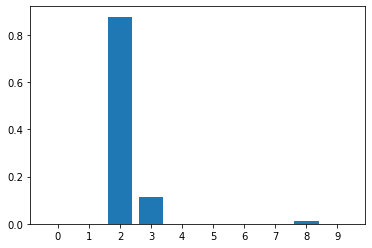

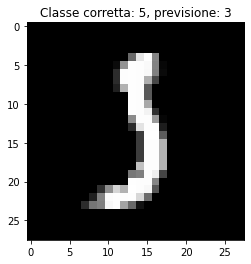

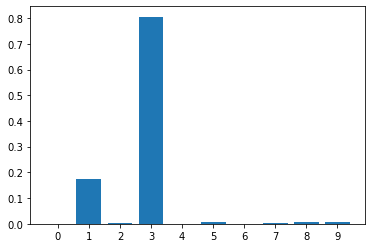

In [105]:
immagini_errore, classe_corretta, previsione = utils.get_first_n_error(nn2, testloader)

for i in range(len(immagini_errore)):
    utils.show_bw_image(immagini_errore[i], title=f"Classe corretta: {classe_corretta[i]}, previsione: {previsione[i]}")
    utils.plot_nn_output(nn1(immagini_errore[i]))

... 0
9
5


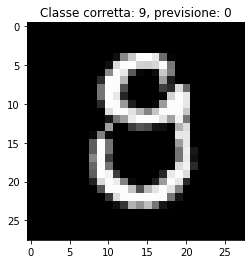

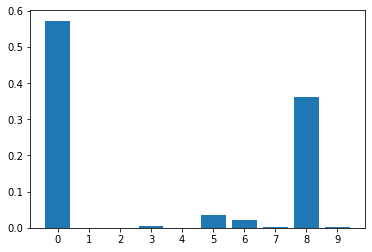

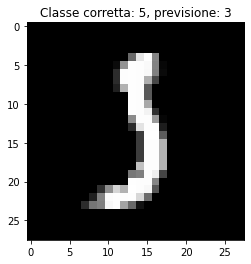

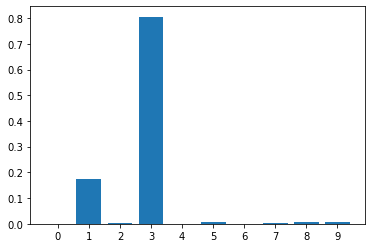

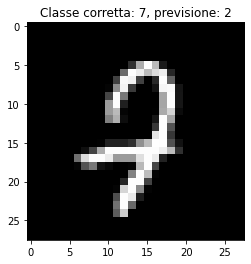

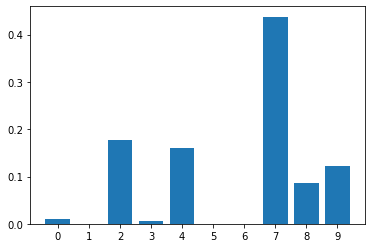

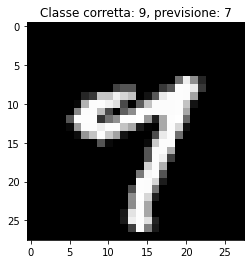

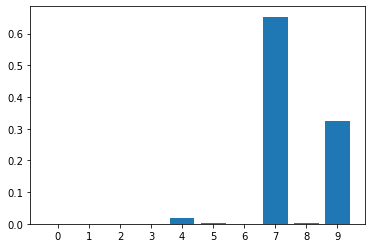

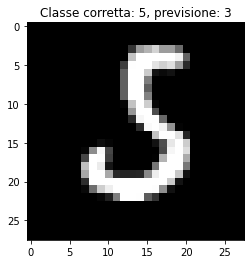

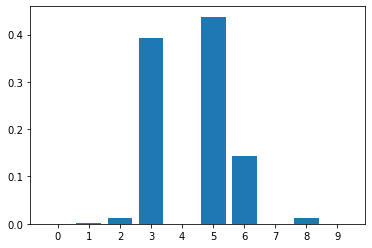

In [106]:
immagini_errore, classe_corretta, previsione = utils.get_first_n_error(nn3, testloader)

for i in range(len(immagini_errore)):
    utils.show_bw_image(immagini_errore[i], title=f"Classe corretta: {classe_corretta[i]}, previsione: {previsione[i]}")
    utils.plot_nn_output(nn1(immagini_errore[i]))

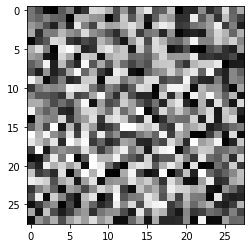

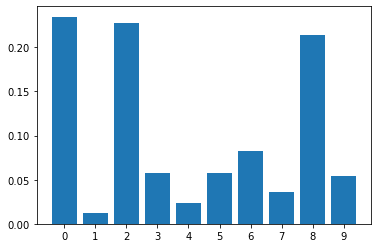

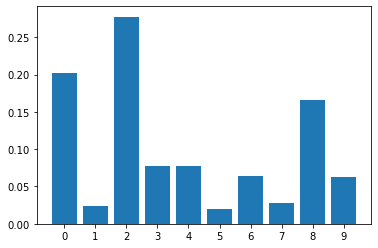

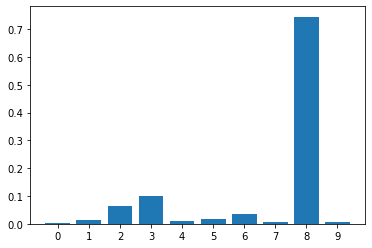

In [107]:
random_image = torch.rand_like(data[0])*2-1
utils.show_bw_image(random_image)
utils.plot_nn_output(nn1(random_image))
utils.plot_nn_output(nn2(random_image))
utils.plot_nn_output(nn3(random_image))

## Ora è il vostro turno, provate ad imbrogliare la rete!

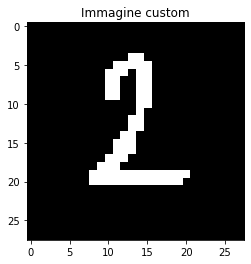

In [122]:
immagine_custom = cv2.imread("immagini/7.png", cv2.IMREAD_GRAYSCALE)
utils.show_bw_image(immagine_custom, "Immagine custom")

Classe: 2


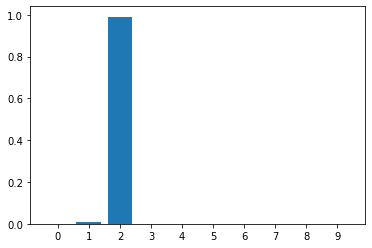

Classe: 2


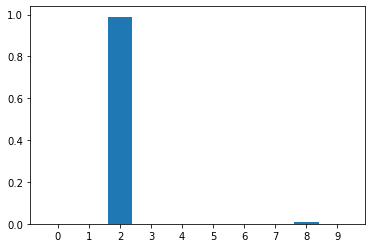

Classe: 2


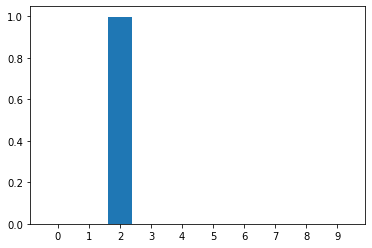

In [123]:
out1, cl1 = utils.evaluate_single_data(nn1, immagine_custom, data_transforms)
out2, cl2 = utils.evaluate_single_data(nn2, immagine_custom, data_transforms)
out3, cl3 = utils.evaluate_single_data(nn3, immagine_custom, data_transforms)

print(f"Classe: {cl1.item()}")
utils.plot_nn_output(out1)
print(f"Classe: {cl2.item()}")
utils.plot_nn_output(out2)
print(f"Classe: {cl3.item()}")
utils.plot_nn_output(out3)

In [16]:
optimizer1 = torch.optim.Adam(nn1.parameters())
optimizer2 = torch.optim.Adam(nn2.parameters())
optimizer3 = torch.optim.Adam(nn3.parameters())

In [17]:
train.train_model(nn1, trainloader, nn.CrossEntropyLoss(), optimizer1, num_epochs=5, checkpoint_loc="models", checkpoint_name="model1.pt")
train.test_model(nn1, testloader)

Epoch 1 --- learning rate 0.00100
Epoch 1 completed. Loss - total: 24616.9189 - average: 0.4103; Performance: 0.8822
Epoch 2 --- learning rate 0.00100
Epoch 2 completed. Loss - total: 12367.3822 - average: 0.2061; Performance: 0.9396
Epoch 3 --- learning rate 0.00100
Epoch 3 completed. Loss - total: 10038.7689 - average: 0.1673; Performance: 0.9515
Epoch 4 --- learning rate 0.00100
Epoch 4 completed. Loss - total: 8522.3166 - average: 0.1420; Performance: 0.9588
Epoch 5 --- learning rate 0.00100
Epoch 5 completed. Loss - total: 7530.9928 - average: 0.1255; Performance: 0.9630
TESTING - loss -- - performance 0.9676


(None, 0.9675833333333334)

In [18]:
train.train_model(nn2, trainloader, nn.CrossEntropyLoss(), optimizer2, num_epochs=5, checkpoint_loc="models", checkpoint_name="model2.pt")
train.test_model(nn2, testloader)

Epoch 1 --- learning rate 0.00100
Epoch 1 completed. Loss - total: 24856.1538 - average: 0.4143; Performance: 0.8815
Epoch 2 --- learning rate 0.00100
Epoch 2 completed. Loss - total: 11544.0848 - average: 0.1924; Performance: 0.9433
Epoch 3 --- learning rate 0.00100
Epoch 3 completed. Loss - total: 8873.7572 - average: 0.1479; Performance: 0.9574
Epoch 4 --- learning rate 0.00100
Epoch 4 completed. Loss - total: 7543.0538 - average: 0.1257; Performance: 0.9629
Epoch 5 --- learning rate 0.00100
Epoch 5 completed. Loss - total: 6544.3123 - average: 0.1091; Performance: 0.9670
TESTING - loss -- - performance 0.9708


(None, 0.9708333333333333)

In [19]:
train.train_model(nn3, trainloader, nn.CrossEntropyLoss(), optimizer3, num_epochs=5, checkpoint_loc="models", checkpoint_name="model3.pt")
train.test_model(nn3, testloader)

Epoch 1 --- learning rate 0.00100
Epoch 1 completed. Loss - total: 25125.9883 - average: 0.4188; Performance: 0.8793
Epoch 2 --- learning rate 0.00100
Epoch 2 completed. Loss - total: 11776.6311 - average: 0.1963; Performance: 0.9434
Epoch 3 --- learning rate 0.00100
Epoch 3 completed. Loss - total: 9047.3029 - average: 0.1508; Performance: 0.9549
Epoch 4 --- learning rate 0.00100
Epoch 4 completed. Loss - total: 7718.6855 - average: 0.1286; Performance: 0.9618
Epoch 5 --- learning rate 0.00100
Epoch 5 completed. Loss - total: 6719.6545 - average: 0.1120; Performance: 0.9670
TESTING - loss -- - performance 0.9821


(None, 0.9821166666666666)

In [76]:

a = (torch.Tensor([1,2,3]) == torch.Tensor([1,2,2]))
torch.where(a==False)[0][0]

tensor(2)